In [32]:
# Imports
from utils import qr_householder, linear_regression

import pandas as pd
import numpy as np

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Read the CSV file
medical_data = pd.read_csv('vidu4_lin_reg.csv')

# A few representative data points
print(medical_data.head())

   ID  TUOI  BMI   HA  GLUCOSE  CHOLESTEROL  BEDAYNTM
0   1    56   21  160     14.0         6.00      1.95
1   2    76   18  150     12.0         4.97      1.33
2   3    63   16  160      4.4         6.39      0.83
3   4    78   20  100      4.0         7.00      2.00
4   5    87   20  110      4.6         4.10      1.30


In [33]:
# # Subset the first 80 data points for training
# training_data = medical_data.iloc[:80].copy()

# X_train = training_data[['TUOI', 'BMI', 'HA', 'GLUCOSE', 'CHOLESTEROL']].values
# y_train = training_data['BEDAYNTM'].values

# # Subset the remaining 20 data points for testing
# test_data = medical_data.iloc[80:].copy()

# X_test = test_data[['TUOI', 'BMI', 'HA', 'GLUCOSE', 'CHOLESTEROL']].values
# y_test = test_data['BEDAYNTM'].values

In [34]:
X = medical_data[['TUOI', 'BMI', 'HA', 'GLUCOSE', 'CHOLESTEROL']].values
y = medical_data['BEDAYNTM'].values

# Split the data into training and testing sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Coefficient of Determination (R-squared) on test data: 0.23209149234182413
Mean Squared Error (MSE) on test data: 0.17851473088966158
Mean Absolute Error (MAE) on test data: 0.24253680178241105


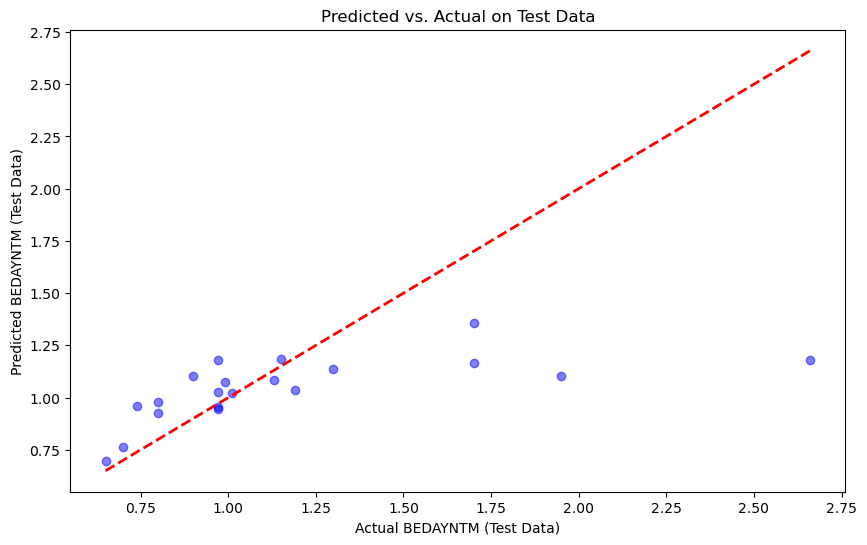

In [35]:
# Method: sklearn linear regression
regr = linear_model.LinearRegression(fit_intercept=True)  # fit_intercept=False for no bias
regr.fit(X_train, y_train)

# Predict on the test set
y_pred_test = regr.predict(X_test)

# Evaluate the model on the test set
r2 = r2_score(y_test, y_pred_test)
print("Coefficient of Determination (R-squared) on test data:", r2)

mse = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error (MSE) on test data:", mse)

mae = mean_absolute_error(y_test, y_pred_test)
print("Mean Absolute Error (MAE) on test data:", mae)

# Plot the test results (Predicted vs. Actual)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.5)
plt.xlabel('Actual BEDAYNTM (Test Data)')
plt.ylabel('Predicted BEDAYNTM (Test Data)')
plt.title('Predicted vs. Actual on Test Data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)  # Reference line
plt.show()